100%|██████████| 300/300 [00:26<00:00, 11.39it/s]


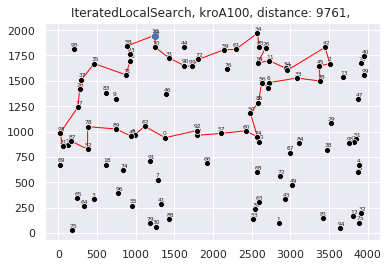

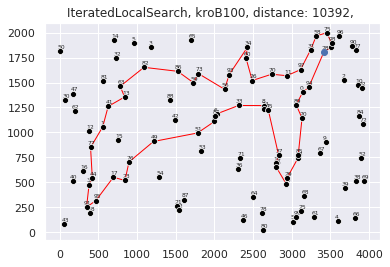

,strategy,instance,cost,time
0,IteratedLocalSearch,kroA100,9761,29.619584
0,IteratedLocalSearch,kroA100,10062,28.026564
0,IteratedLocalSearch,kroA100,10329,27.192746
0,IteratedLocalSearch,kroA100,10054,27.202990
0,IteratedLocalSearch,kroA100,10609,27.545331
0,IteratedLocalSearch,kroA100,10248,27.217422
0,IteratedLocalSearch,kroA100,9857,28.098911
0,IteratedLocalSearch,kroA100,9933,27.759537
0,IteratedLocalSearch,kroA100,10216,27.020737
0,IteratedLocalSearch,kroA100,10359,27.547476


In [1]:
from collections import defaultdict
from itertools import product
from random import seed

import seaborn as sns
import numpy as np
from tqdm import tqdm

from strategies.greedy_cycle.cheapest_insertion import CheapestInsertion
from api.instance import Instance
from strategies.iterated_local_search.iterated_local_search import IteratedLocalSearch
from strategies.local_search.local_search import LocalSearch
from strategies.local_search_candidates_moves.local_search_candidates_moves import LocalSearchWitchCandidatesMoves
from strategies.ls_cache.local_search_with_cache import LocalSearchWitchCache
from strategies.multiple_local_search.multiple_local_search import MultipleStartLocalSearch
from utils.utils import draw_solution
import pandas as pd

sns.set()
df = pd.DataFrame(columns=['strategy','instance', 'cost', 'time'])
for instance_name in ['kroA100', 'kroB100']:
    instance = Instance(name=instance_name)
    solve_strategy1: IteratedLocalSearch = IteratedLocalSearch(
        instance=instance,
    )
    solve_strategies = {}
    solve_strategies["IteratedLocalSearch"] = solve_strategy1
    
    for str_id in solve_strategies.keys():
        solve_strategy = solve_strategies[str_id]
        solve_strategy.run(run_times=10)
        for s, cost, time in solve_strategy.solutions:
            df = df.append(pd.DataFrame([[str_id, instance_name, cost, time]], columns=['strategy','instance', 'cost', 'time']))
        costs = list(map(lambda x: x[1], solve_strategy.solutions))
        draw_solution(
            instance=instance,
            solution=solve_strategy.solution,
            title=f'{str_id}, {instance.name}, distance: {solve_strategy.solution_cost}, ',
            save_file_name=f'{instance.name}_{min(costs)}_{str_id}.png'
        )
df

In [2]:
df['cost'] = df['cost'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 0 to 0
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   strategy  20 non-null     object 
 1   instance  20 non-null     object 
 2   cost      20 non-null     float64
 3   time      20 non-null     float64
dtypes: float64(2), object(2)
memory usage: 800.0+ bytes


In [3]:
df_cost = df.groupby(['instance', 'strategy']).agg({'cost' : ['min','mean', 'max']}).astype(int)
df_cost

cost              
                                min   mean    max
instance strategy                                
kroA100  IteratedLocalSearch   9761  10142  10609
kroB100  IteratedLocalSearch  10392  10534  10838

In [4]:
df_time = df.groupby(['instance','strategy']).agg({'time' : ['min','mean', 'max']}).round(3)
df_time

time                
                                 min    mean     max
instance strategy                                   
kroA100  IteratedLocalSearch  27.021  27.723  29.620
kroB100  IteratedLocalSearch  26.334  27.772  28.929

In [5]:

print(df_cost.to_latex())

\begin{tabular}{llrrr}
\toprule
        &                     & \multicolumn{3}{l}{cost} \\
        &                     &    min &   mean &    max \\
instance & strategy &        &        &        \\
\midrule
kroA100 & IteratedLocalSearch &   9761 &  10142 &  10609 \\
kroB100 & IteratedLocalSearch &  10392 &  10534 &  10838 \\
\bottomrule
\end{tabular}



In [6]:
print(df_time.to_latex())



\begin{tabular}{llrrr}
\toprule
        &                     & \multicolumn{3}{l}{time} \\
        &                     &     min &    mean &     max \\
instance & strategy &         &         &         \\
\midrule
kroA100 & IteratedLocalSearch &  27.021 &  27.723 &  29.620 \\
kroB100 & IteratedLocalSearch &  26.334 &  27.772 &  28.929 \\
\bottomrule
\end{tabular}

